<a href="https://colab.research.google.com/github/viviennejuma/R-unsupervised/blob/main/Dimensionality_Reduction_and_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [1]:
install.packages("devtools")
library(devtools)
install_github("vqv/ggbiplot")
install.packages("rvtools")
install.packages("DataExplorer")
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis




plyr (NA -> 1.8.6) [CRAN]


Installing 1 packages: plyr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpBWuwLz/remotes3a3655eb76/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rvtools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvn

# Loading the libraries

In [2]:
#specify the path where the file is located
library("data.table")
library(tidyverse)
library(magrittr)
library(warn = -1)
library("ggbiplot")
library(ggplot2)
library(lattice)
library(corrplot)
library(DataExplorer)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(caret)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dpl

# Loading the datasets

In [3]:
#specify the path where the file is located
library("data.table")

In [4]:
reduction <- fread("http://bit.ly/CarreFourDataset")
head(reduction,2)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200


# Data cleaning & checking


In [5]:
colnames(reduction)

[1] "Invoice ID"              "Branch"                 
 [3] "Customer type"           "Gender"                 
 [5] "Product line"            "Unit price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "gross income"           
[15] "Rating"                  "Total"

In [6]:
str(reduction)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross margin percentage: num  4.76 4.7

In [7]:
dim(reduction)

[1] 1000   16

In [8]:
sapply(reduction,class)

Invoice ID                  Branch           Customer type 
            "character"             "character"             "character" 
                 Gender            Product line              Unit price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross margin percentage            gross income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

In [9]:
sum(is.na(reduction))

[1] 0

In [10]:
sum(duplicated(reduction))

[1] 0

# PCA

In [11]:
# renaming columns
# renaming columns for easy analysis
# Rename column where names is "Sepal.Length"
names(reduction)[names(reduction) == "Unit price"] <- "unit_price"
names(reduction)[names(reduction) == "gross income"] <- "gross_income"
names(reduction)[names(reduction) == "gross margin percentage"] <- "gross_margin_percentage"
names(reduction)[names(reduction) == "Customer type"] <- "Customer_type"
names(reduction)[names(reduction) == "Product line"] <- "Production_line"
head(reduction,2)

Invoice ID,Branch,Customer_type,Gender,Production_line,unit_price,Quantity,Tax,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200


In [12]:
# Convert data types using as.integer
# Branch
reduction$Branch<-as.integer(as.factor(reduction$Branch))
# Customer Type
reduction$Customer_type<-as.integer(as.factor(reduction$Customer_type))
# Gender
reduction$Gender<-as.integer(as.factor(reduction$Gender))
# Product.line
reduction$Product_line<-as.integer(as.factor(reduction$Product_line))
#Payment
reduction$Payment<-as.integer(as.factor(reduction$Payment))

In [13]:
reduction_num <- select_if(reduction,is.numeric)
str(reduction_num)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer_type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : int  1 1 2 2 2 2 1 1 1 1 ...
 $ unit_price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross_margin_percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross_income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Product_line           : int  NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [14]:
# We are going to use the var function to check the variance of the different columns
apply(reduction_num, 2, var)

Branch           Customer_type                  Gender 
           6.685245e-01            2.502492e-01            2.502492e-01 
             unit_price                Quantity                     Tax 
           7.019653e+02            8.546446e+00            1.370966e+02 
                Payment                    cogs gross_margin_percentage 
           6.896887e-01            5.483864e+04            0.000000e+00 
           gross_income                  Rating                   Total 
           1.370966e+02            2.953518e+00            6.045960e+04 
           Product_line 
                     NA

In [15]:
# Let's find which variables have zero variance
which(apply(reduction, 2, var) == 0)

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”


gross_margin_percentage 
                     13

In [16]:
# dropping the columns with zero column variance
reduction_num = select(reduction_num, -gross_margin_percentage, -Product_line)

In [17]:
# We then pass df to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
# ---
# 
reduction.pca <- prcomp(reduction_num, center = TRUE, scale. = TRUE)
summary(reduction.pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.220 1.0572 1.01475 1.00578 0.98599 0.97440 0.94962
Proportion of Variance 0.448 0.1016 0.09361 0.09196 0.08838 0.08631 0.08198
Cumulative Proportion  0.448 0.5496 0.64319 0.73516 0.82354 0.90985 0.99183
                           PC8       PC9      PC10      PC11
Standard deviation     0.29978 5.864e-16 1.844e-16 1.214e-16
Proportion of Variance 0.00817 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000e+00 1.000e+00 1.000e+00

In [18]:
# Calling str() to have a look at your PCA object
# ---
# 
str(reduction.pca)

List of 5
 $ sdev    : num [1:11] 2.22 1.057 1.015 1.006 0.986 ...
 $ rotation: num [1:11, 1:11] 0.0227 -0.0124 -0.0282 0.2913 0.3245 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Branch" "Customer_type" "Gender" "unit_price" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 1.99 1.5 1.5 55.67 5.51 ...
  ..- attr(*, "names")= chr [1:11] "Branch" "Customer_type" "Gender" "unit_price" ...
 $ scale   : Named num [1:11] 0.818 0.5 0.5 26.495 2.923 ...
  ..- attr(*, "names")= chr [1:11] "Branch" "Customer_type" "Gender" "unit_price" ...
 $ x       : num [1:1000, 1:11] 2.007 -2.251 0.118 1.45 2.72 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


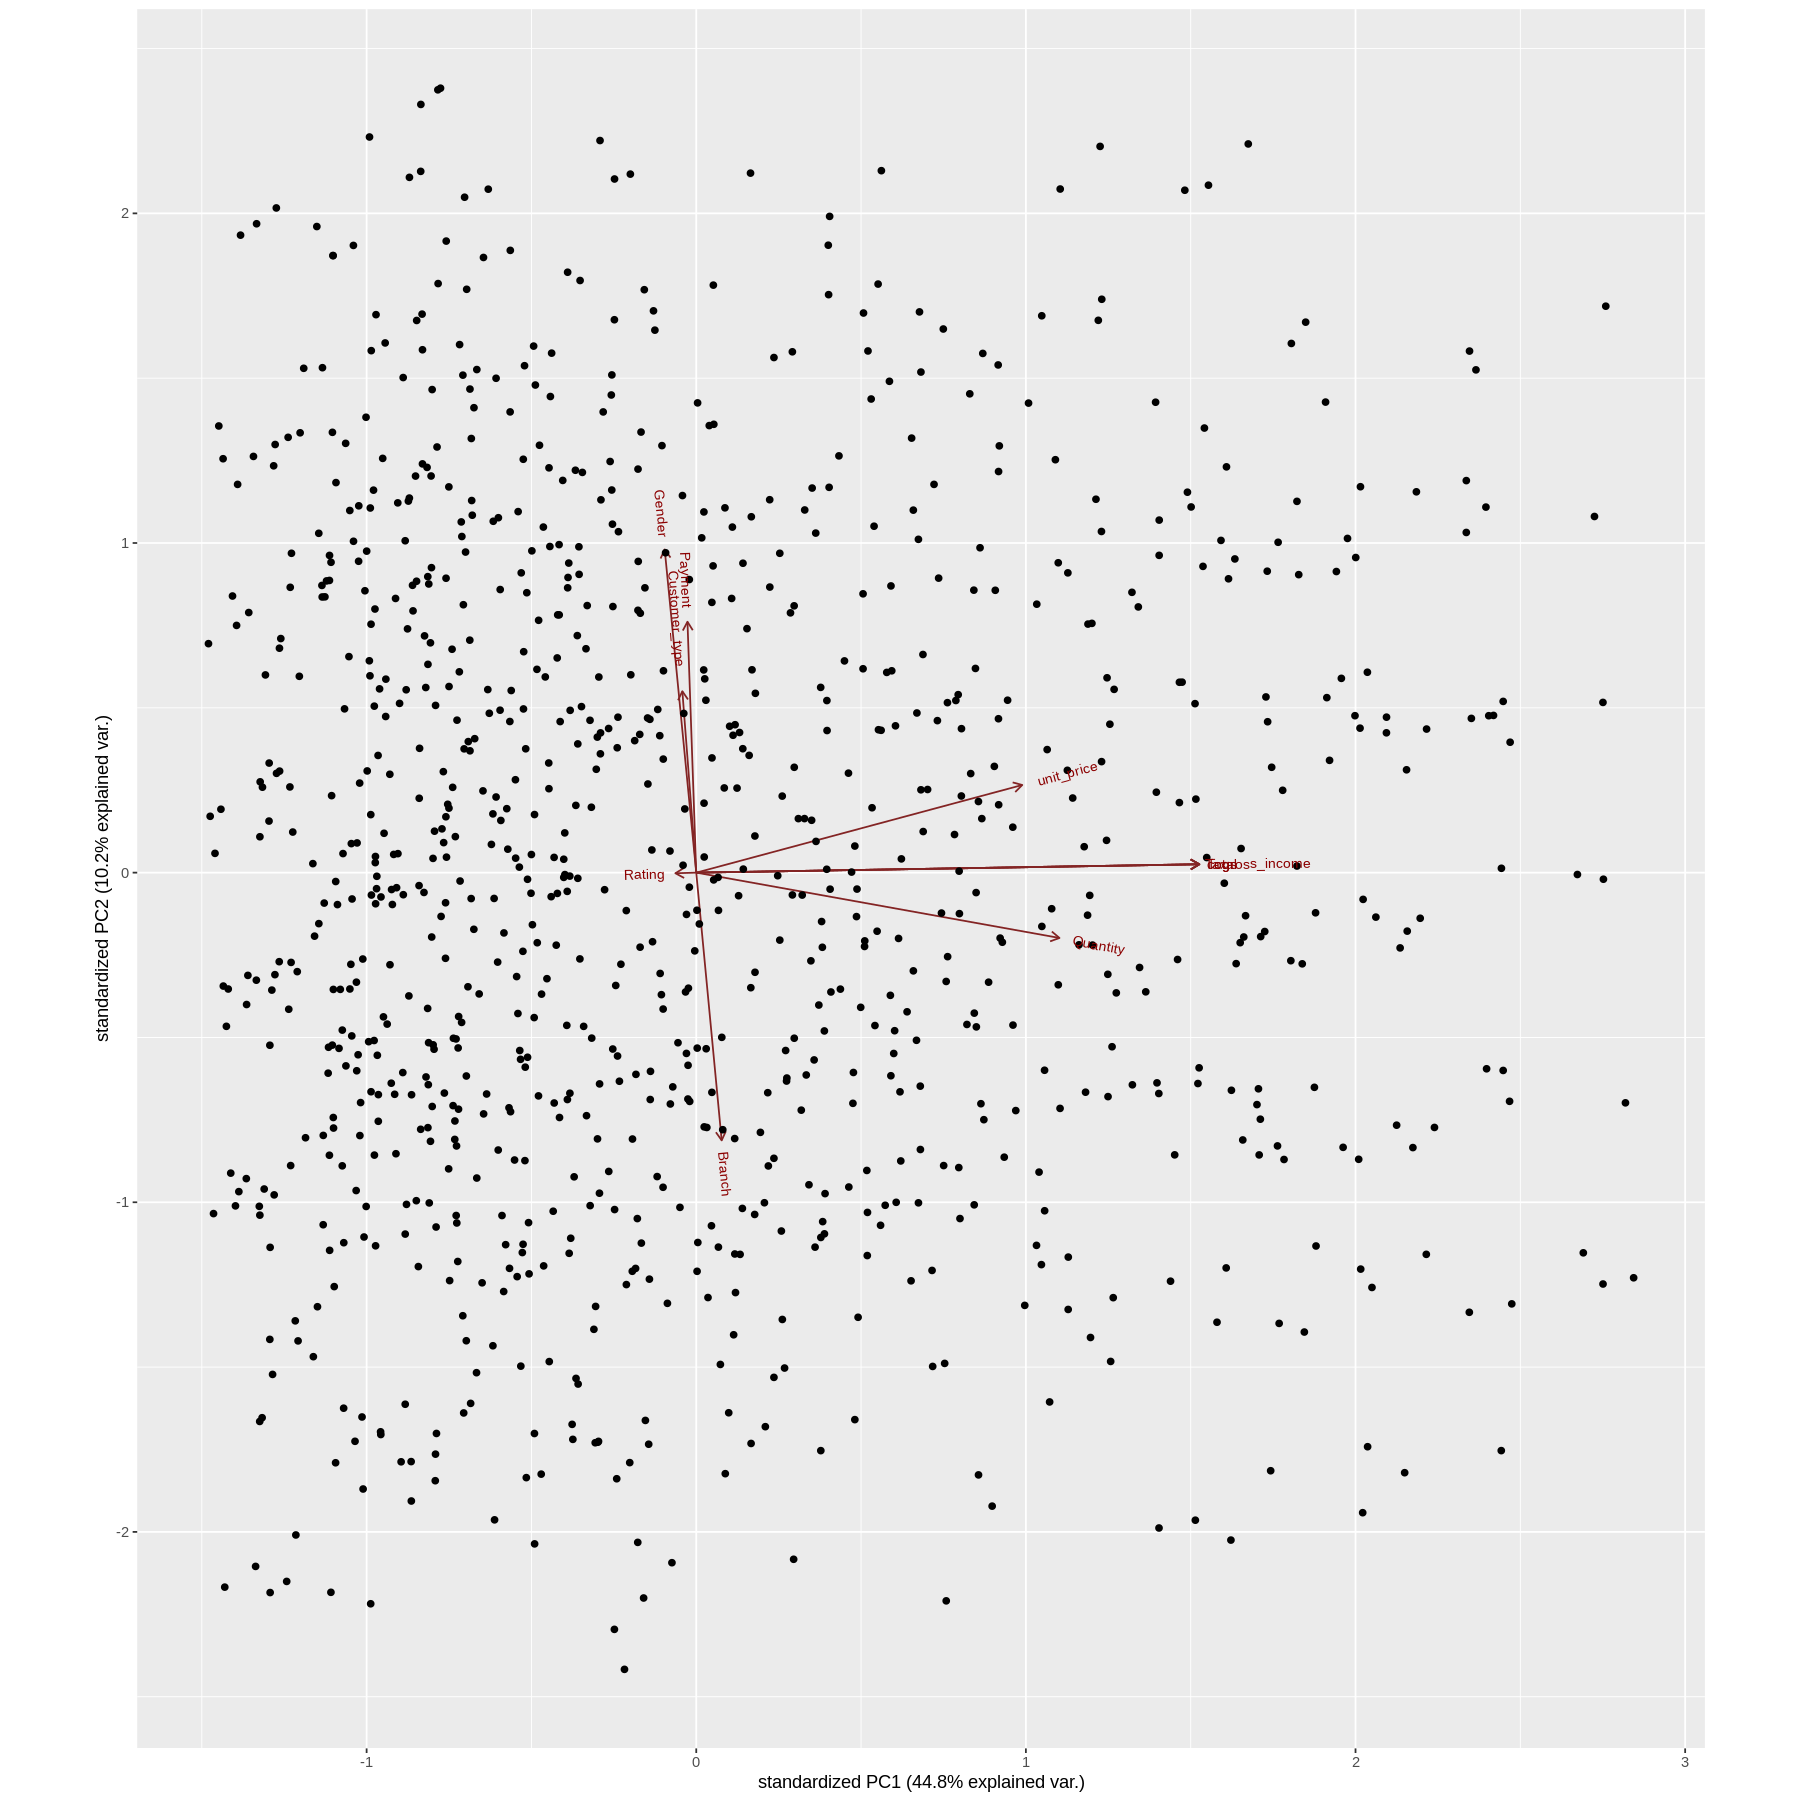

In [27]:
# Then Loading our ggbiplot library
#  
options(repr.plot.width = 15, repr.plot.height = 15)
library(ggbiplot)
ggbiplot(reduction.pca)

In [21]:
#install.packages("Rtsne")
library(Rtsne)
tsne <- Rtsne(reduction_num, dims = 2, perplexity=30, verbose=TRUE, max_iter =
500)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performing PCA
Read the 1000 x 11 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 59.456914 (50 iterations in 0.13 seconds)
Iteration 100: error is 52.266327 (50 iterations in 0.12 seconds)
Iteration 150: error is 51.084927 (50 iterations in 0.13 seconds)
Iteration 200: error is 50.749314 (50 iterations in 0.13 seconds)
Iteration 250: error is 50.615837 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.565281 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.410076 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.370853 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.352619 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.345963 (50 iterations in 0.13 seconds)
Fitting performed in 1.27 seconds.


In [22]:
reduction_num$Rating_num = as.integer(reduction_num$Rating)

In [23]:
#Preparing the database for analysis
Labels<-reduction_num$Rating_num
reduction_num$Rating_num<-as.factor(reduction_num$Rating_num)


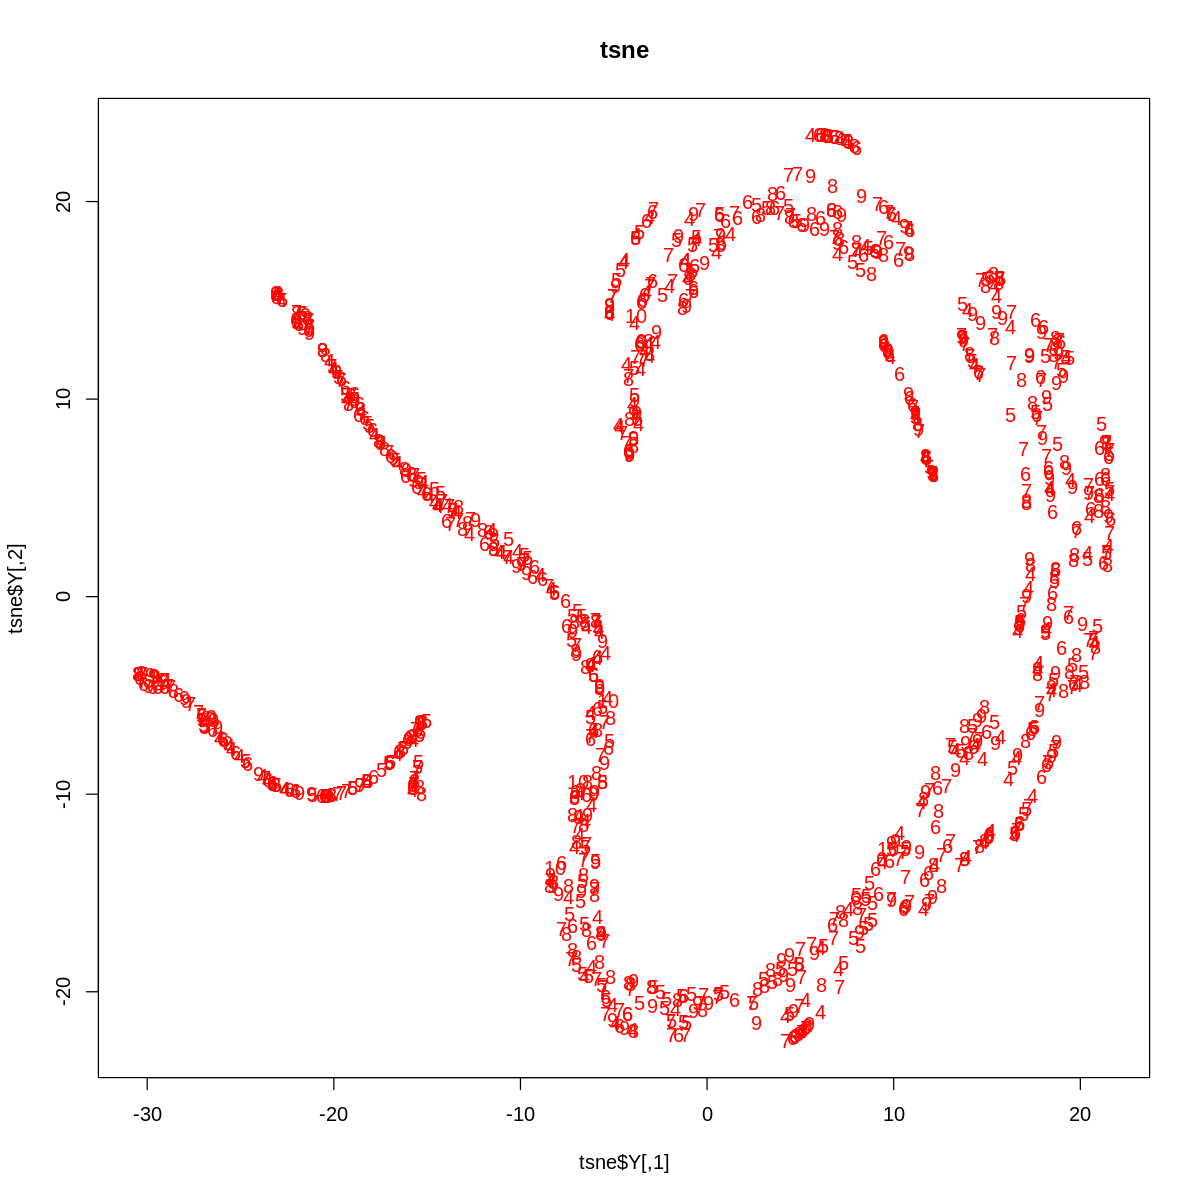

In [25]:
# For plotting
options(repr.plot.width = 10, repr.plot.height = 10)
colors = rainbow(length(reduction_num$Rating_num))
names(colors) = unique(reduction_num$Rating_num)
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=reduction_num$Rating_num,
col=colors[reduction_num$Rating_num])


# Feature selection

In [ ]:
# selecting needed columns
reduction_num2 <- subset(reduction_num, select = c("unit_price", "Quantity", "Tax", "cogs", "gross_income", "Rating", "Total"))
colnames(reduction_num2)

[1] "unit_price"   "Quantity"     "Tax"          "cogs"         "gross_income"
[6] "Rating"       "Total"

In [ ]:
# Calculating the correlation matrix
correlationMatrix <- cor(reduction_num2)
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated

[1] 3 4 5

In [ ]:
# Removing Redundant Features 
reduction_num3<-reduction_num2[-highlyCorrelated]

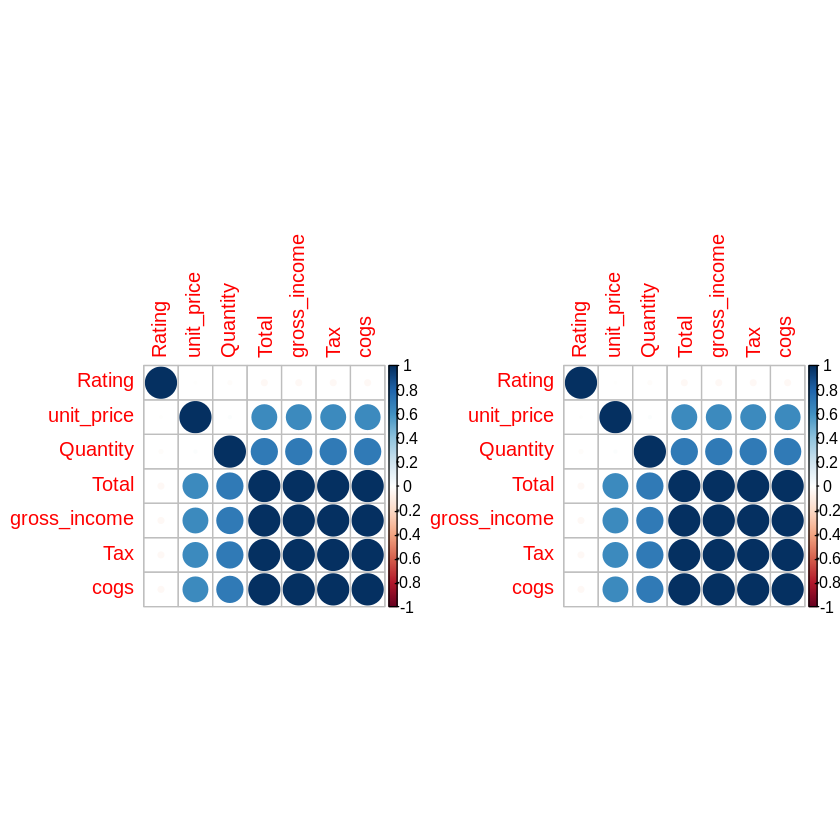

In [ ]:
# Performing our graphical comparison
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(reduction_num3), order = "hclust")

## Using Feature Ranking

In [ ]:
install.packages("FSelector")
library(FSelector)
colnames(reduction_num2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’




[1] "unit_price"   "Quantity"     "Tax"          "cogs"         "gross_income"
[6] "Rating"       "Total"

In [ ]:
Scores <- linear.correlation(unit_price~., reduction_num2)
Scores 

,attr_importance
,<dbl>
Quantity,0.010588977
Tax,0.634088606
cogs,0.634088606
gross_income,0.634088606
Rating,0.008323746
Total,0.634088606


In [ ]:
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<chr>
Tax
cogs
gross_income
Total
Quantity


In [ ]:
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<chr>
Tax
cogs


In [ ]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;
# ---
# 
Scores2 <- information.gain(unit_price~., reduction_num2)

In [ ]:
# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)


Subset3
<chr>
Tax
cogs
gross_income
Total
Quantity


In [ ]:
# Installing and loading our clustvarsel package
suppressWarnings(
    suppressMessages(if
                     (!require(clustvarsel, quietly=TRUE))
        install.packages("clustvarsel")))
library(clustvarsel)

Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:psych’:

    sim


The following object is masked from ‘package:purrr’:

    map


Package 'clustvarsel' version 2.3.4

Type 'citation("clustvarsel")' for citing this R package in publications.



In [ ]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
    suppressMessages(if
                     (!require(mclust, quietly=TRUE))
        install.packages("mclust")))
library(mclust)


In [ ]:
# Sequential forward greedy search (default)
out = clustvarsel(reduction_num, G = 1:5)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G   BICdiff Decision
               Tax          Add  -7362.07     V 4  387.6394 Accepted
          Quantity          Add -11144.45   VEE 5  519.0176 Accepted
        unit_price          Add -16177.39   EVV 5 2843.5462 Accepted
        unit_price       Remove -11144.45   VEE 5 2843.5462 Rejected
            Rating          Add -20293.56   EVV 5 -191.7784 Rejected
        unit_price       Remove -11144.45   VEE 5 2843.5462 Rejected

Selected subset: Tax, Quantity, unit_price

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust X (univariate normal) model with 1 component: 

 log-likelihood n df      BIC      ICL
      -3.648618 3  2 -9.49446 -9.49446

Clustering table:
1 
3 

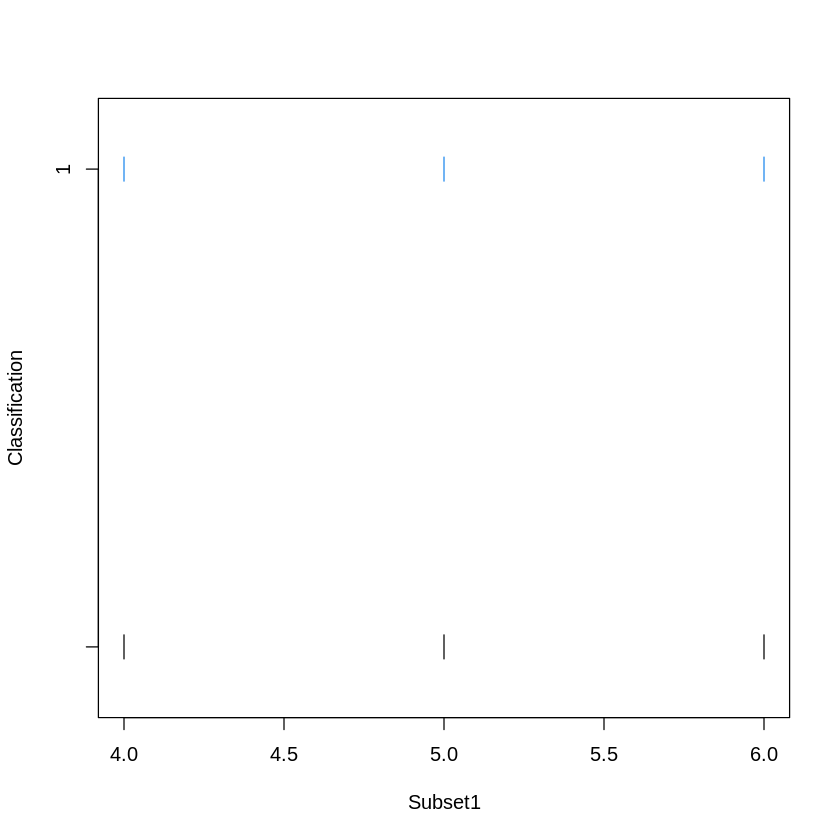

In [ ]:
# building the clustering model:
Subset1 = reduction_num2[,out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod)
#
plot(mod,c("classification"))


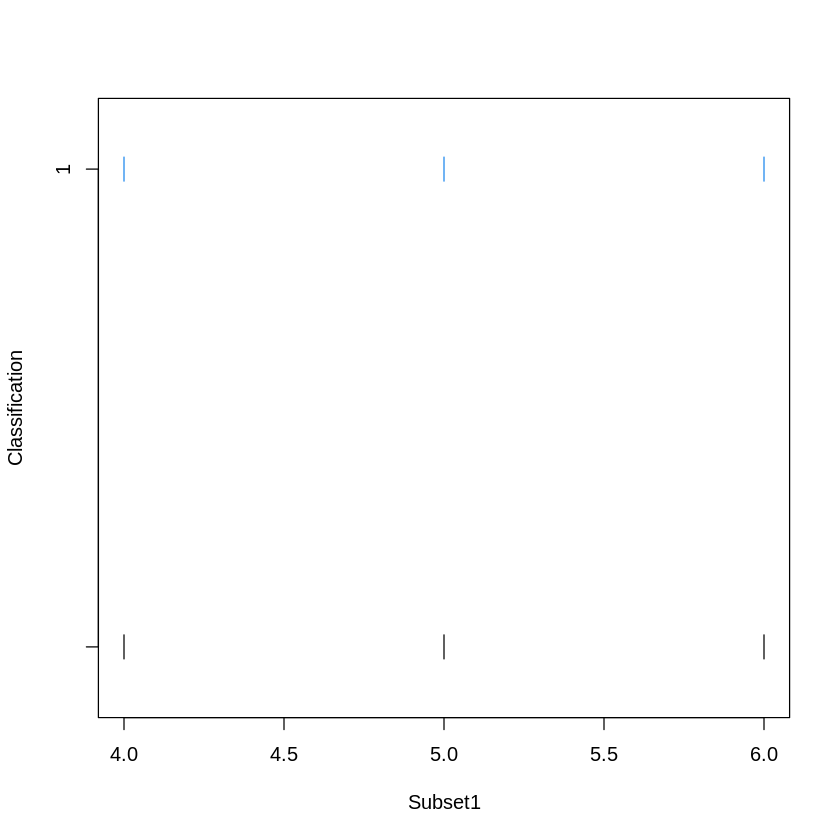

In [ ]:
plot(mod,c("classification"))


In [ ]:
install.packages("wskm")
library(wskm)
reduction_num4 <- reduction_num[,apply(reduction_num2, 2, var, na.rm=TRUE) != 0]
reduction_num4=prcomp(reduction_num4)
model <- ewkm(reduction_num2[1:4], 3, lambda=2, maxiter=1000)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cluster Plot against 1st 2 principal components
install.packages("cluster")
library(cluster)
clusplot(reduction_num2[1:4], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=3,main='Cluster Analysis for Iris')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
#checking weights
round(model$weights*100,2)

,unit_price,Quantity,Tax,cogs,gross_income,Rating,Total
1,14.29,14.29,14.29,14.29,14.29,14.29,14.29
2,14.29,14.29,14.29,14.29,14.29,14.29,14.29
3,0.00,40.46,6.79,0.00,6.79,45.96,0.00
